# Demo for using oa-armsim

In [5]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
if 'src' not in sys.path:
    sys.path.append('src')
import utils

In [27]:
import importlib 
importlib.reload(utils)

seed=99
resolutionXY = 256 ## acoustic pressure map is a square 
cylinder_size_max = 15 # pixels
cylinder_size_min = 1 # pixels
max_depth_cylinder_from_skin = 90
numEllipsesMax = 8 #not used anymore
lims_rot_x = 80 ## max rotation along x-axis (axis parallel to skinline), high values can lead to vessels being parallel to imaging plane  
lims_rot_y = 30 ## max rotation along y-axis (axis orthogonal to skinline)
behind_skin_noise = True
skin_noise_min = 10 #pixels
skin_noise_max = 40 #pixels
vessel_noise = True
prng = np.random.RandomState(seed)
sim_ellipses_obj = utils.GenerateVesselsAndSkinAndMasks(resolutionXY=resolutionXY, cylinder_size_max=cylinder_size_max, cylinder_size_min=cylinder_size_min, \
    max_depth_cylinder_from_skin=max_depth_cylinder_from_skin, numEllipsesMax=numEllipsesMax, lims_rot_x=lims_rot_x, lims_rot_y=lims_rot_y, \
        skin_noise_min=skin_noise_min, skin_noise_max=skin_noise_max, behind_skin_noise=behind_skin_noise, vessel_noise=vessel_noise, prng=prng)  
syntheticImage_fn = sim_ellipses_obj.generate

multichannel2images = lambda im_mc: (im_mc[...,0], im_mc[...,1])

In [28]:
gt, gt_multichannel = syntheticImage_fn() 
gt_skin, gt_vessels = multichannel2images(gt_multichannel)
gt_labels = utils.process_vessel_and_skinline(v=gt_vessels, sl=gt_skin)

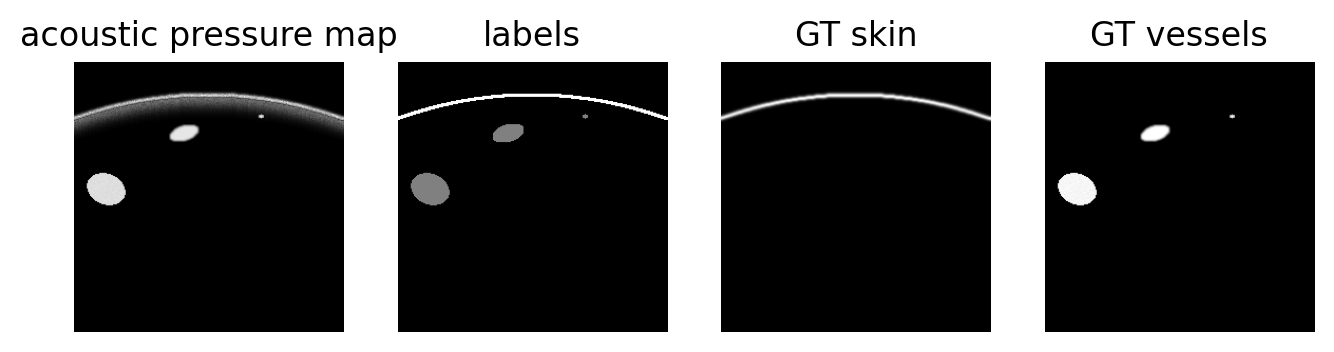

<Figure size 432x288 with 0 Axes>

In [31]:
ncols = 4
ims = (gt, gt_labels, gt_skin, gt_vessels)
titles = ('acoustic pressure map', 'labels', 'GT skin', 'GT vessels')
fig, axs = plt.subplots(nrows=1,ncols=ncols, figsize=(8*1,8*ncols), dpi=200)
for i in range(len(ims)):
    axs[i].set_title(f"{titles[i]}") 
    im = ims[i]
    axs[i].set_axis_off()
    axs[i].imshow(im, cmap='gray')
plt.show()
# plt.savefig('resources/sample.png')